# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$$ d_{w}Q(w) = d_{w}(\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} d_{w}( \left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} d_{w}\left( y - Xw \right)^T \left( y - Xw \right) + \dfrac{1}{\ell} \left( y - Xw \right)^T d_{w}\left( y - Xw \right) = \dfrac{1}{\ell} d_{w}\left( -w^TX^T \right) \left( y - Xw \right) + \dfrac{1}{\ell} \left( y - Xw \right)^T d_{w}\left( y - Xw \right) = -\dfrac{1}{\ell} d_{w} w^T X^T \left( y - Xw \right) - \dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w = -\dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w - \dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w = - \dfrac{2}{\ell} \left( y - Xw \right)^T X d_{w} w
$$

Найдем градиент:
$$ \nabla Q(w) = (- \dfrac{2}{\ell} \left( y - Xw \right)^T X)^T = - \dfrac{2}{\ell} X^T ( y - Xw )$$


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](https://github.com/esokolov/ml-course-hse/blob/master/2023-fall/homeworks-practice/homework-practice-03-gd/adam_meme.png?raw=1)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [ ]:
from __future__ import annotations

from typing import List

from descents import BaseDescent

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95752453/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95753421/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95764280/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95765516/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95776197/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

from descents import get_descent
from linear_regression import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2023-fall/homeworks-practice/homework-practice-03-gd/autos.csv')

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


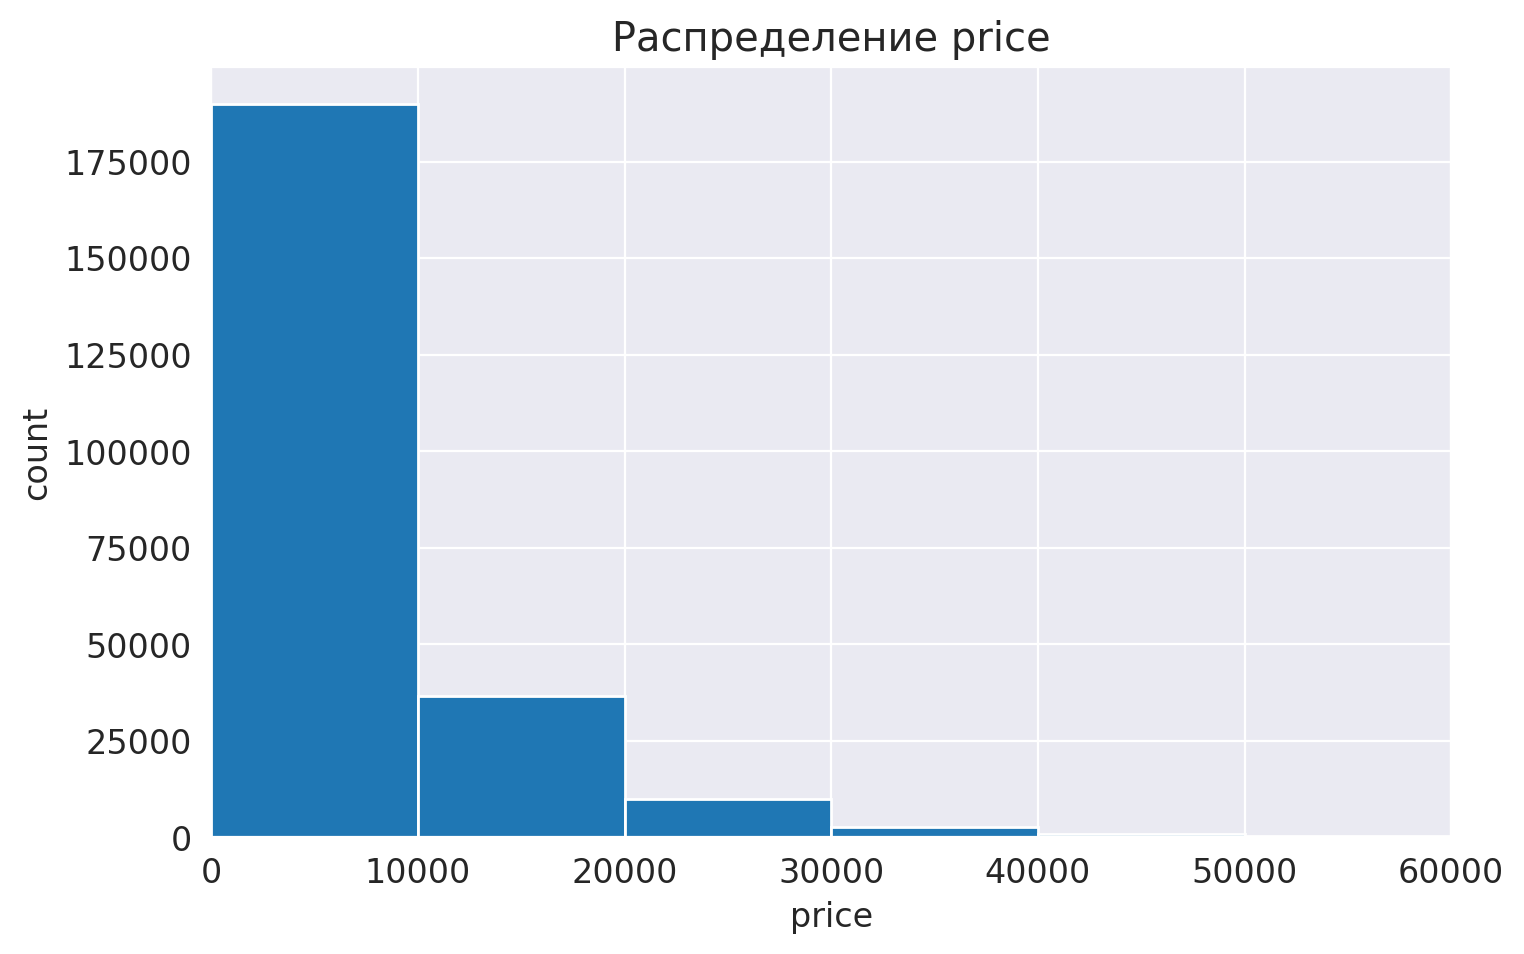

In [ ]:
plt.hist(data['price'])

plt.xlim(0, 60_000)
plt.title("Распределение price")
plt.ylabel("count")
plt.xlabel("price")
plt.show()



> Распределение цены кажется не особо информативным, поэтому нарисуем график в логарифмической шкале и введем соответствующий признак



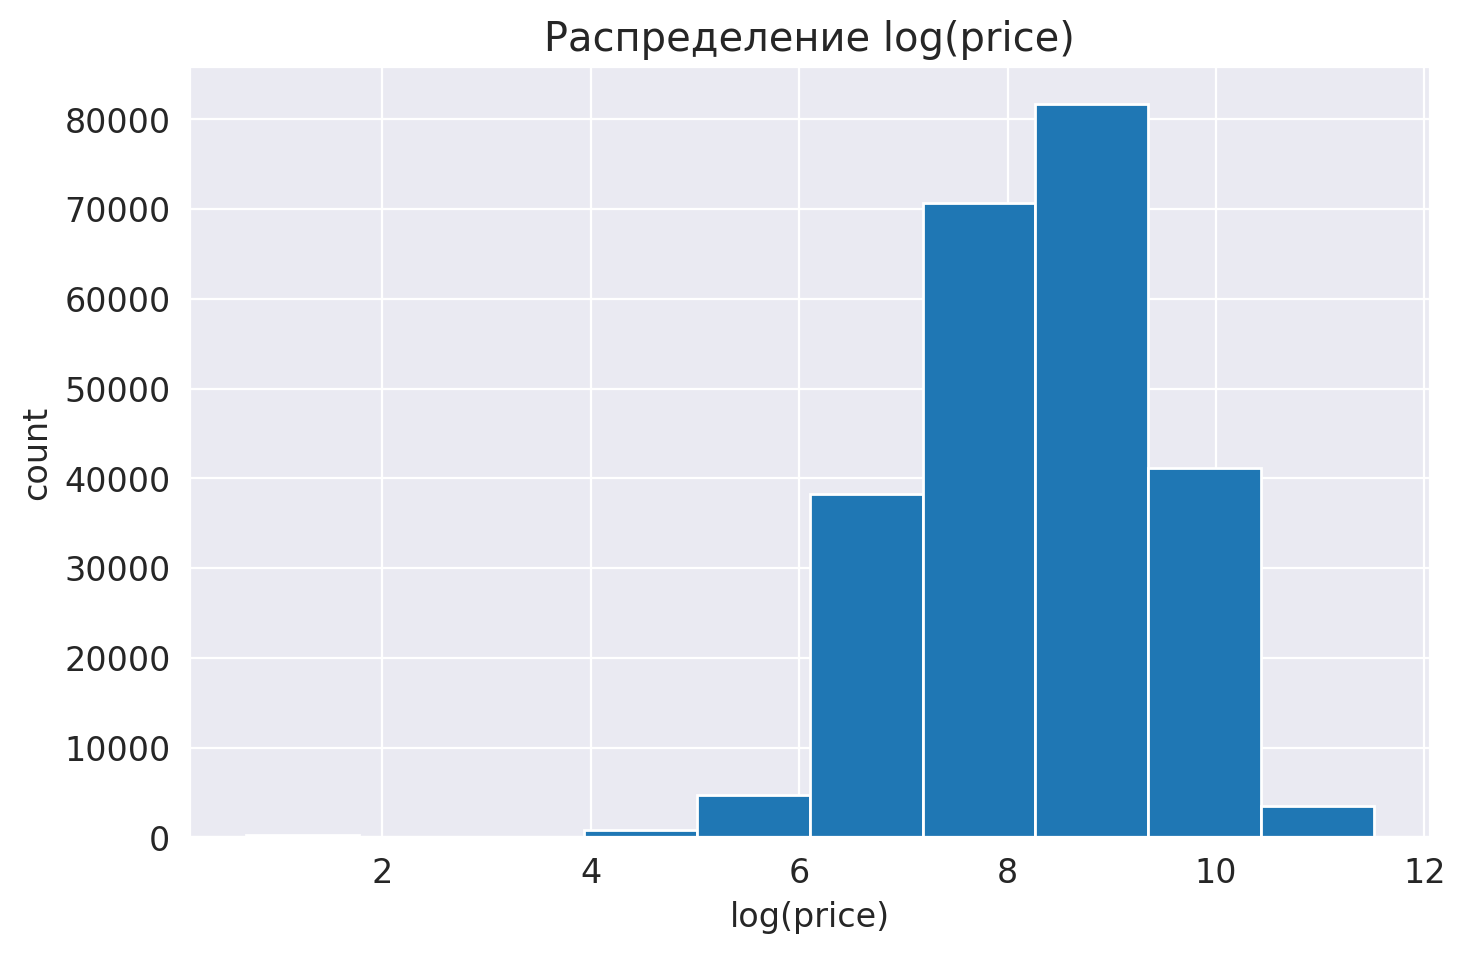

In [ ]:
log_price = np.log1p(data['price'].values)

plt.title("Распределение log(price)")
plt.ylabel("count")
plt.xlabel("log(price)")
plt.hist(log_price)
plt.show()

In [ ]:
data['log_price'] = log_price

# выведем некоторые цены
data['price'].agg(['min', 'max', 'mean'])

min         1.000000
max     99999.000000
mean     6887.741892
Name: price, dtype: float64

In [ ]:
# отсечем 10 процентов выборки (5 с конца и 5 с начала) - избавление от выбросов
data = data[(data['price'] >= np.percentile(data['price'], 5)) & \
    (data['price'] <= np.percentile(data['price'], 95))]
data.shape

(217527, 11)

In [ ]:
# выведем некоторые цены для выборки без выбросов
display(data['price'].agg(['min', 'max', 'mean']))
data.drop(columns=['price'], inplace=True)

min       599.000000
max     22000.000000
mean     5833.475118
Name: price, dtype: float64

<ipython-input-15-5410f33b8f1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['price'], inplace=True)


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217527 entries, 0 to 241188
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              217527 non-null  object 
 1   model              217527 non-null  object 
 2   vehicleType        217527 non-null  object 
 3   gearbox            217527 non-null  object 
 4   fuelType           217527 non-null  object 
 5   notRepairedDamage  217527 non-null  object 
 6   powerPS            217527 non-null  int64  
 7   kilometer          217527 non-null  int64  
 8   autoAgeMonths      217527 non-null  int64  
 9   log_price          217527 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 18.3+ MB


In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

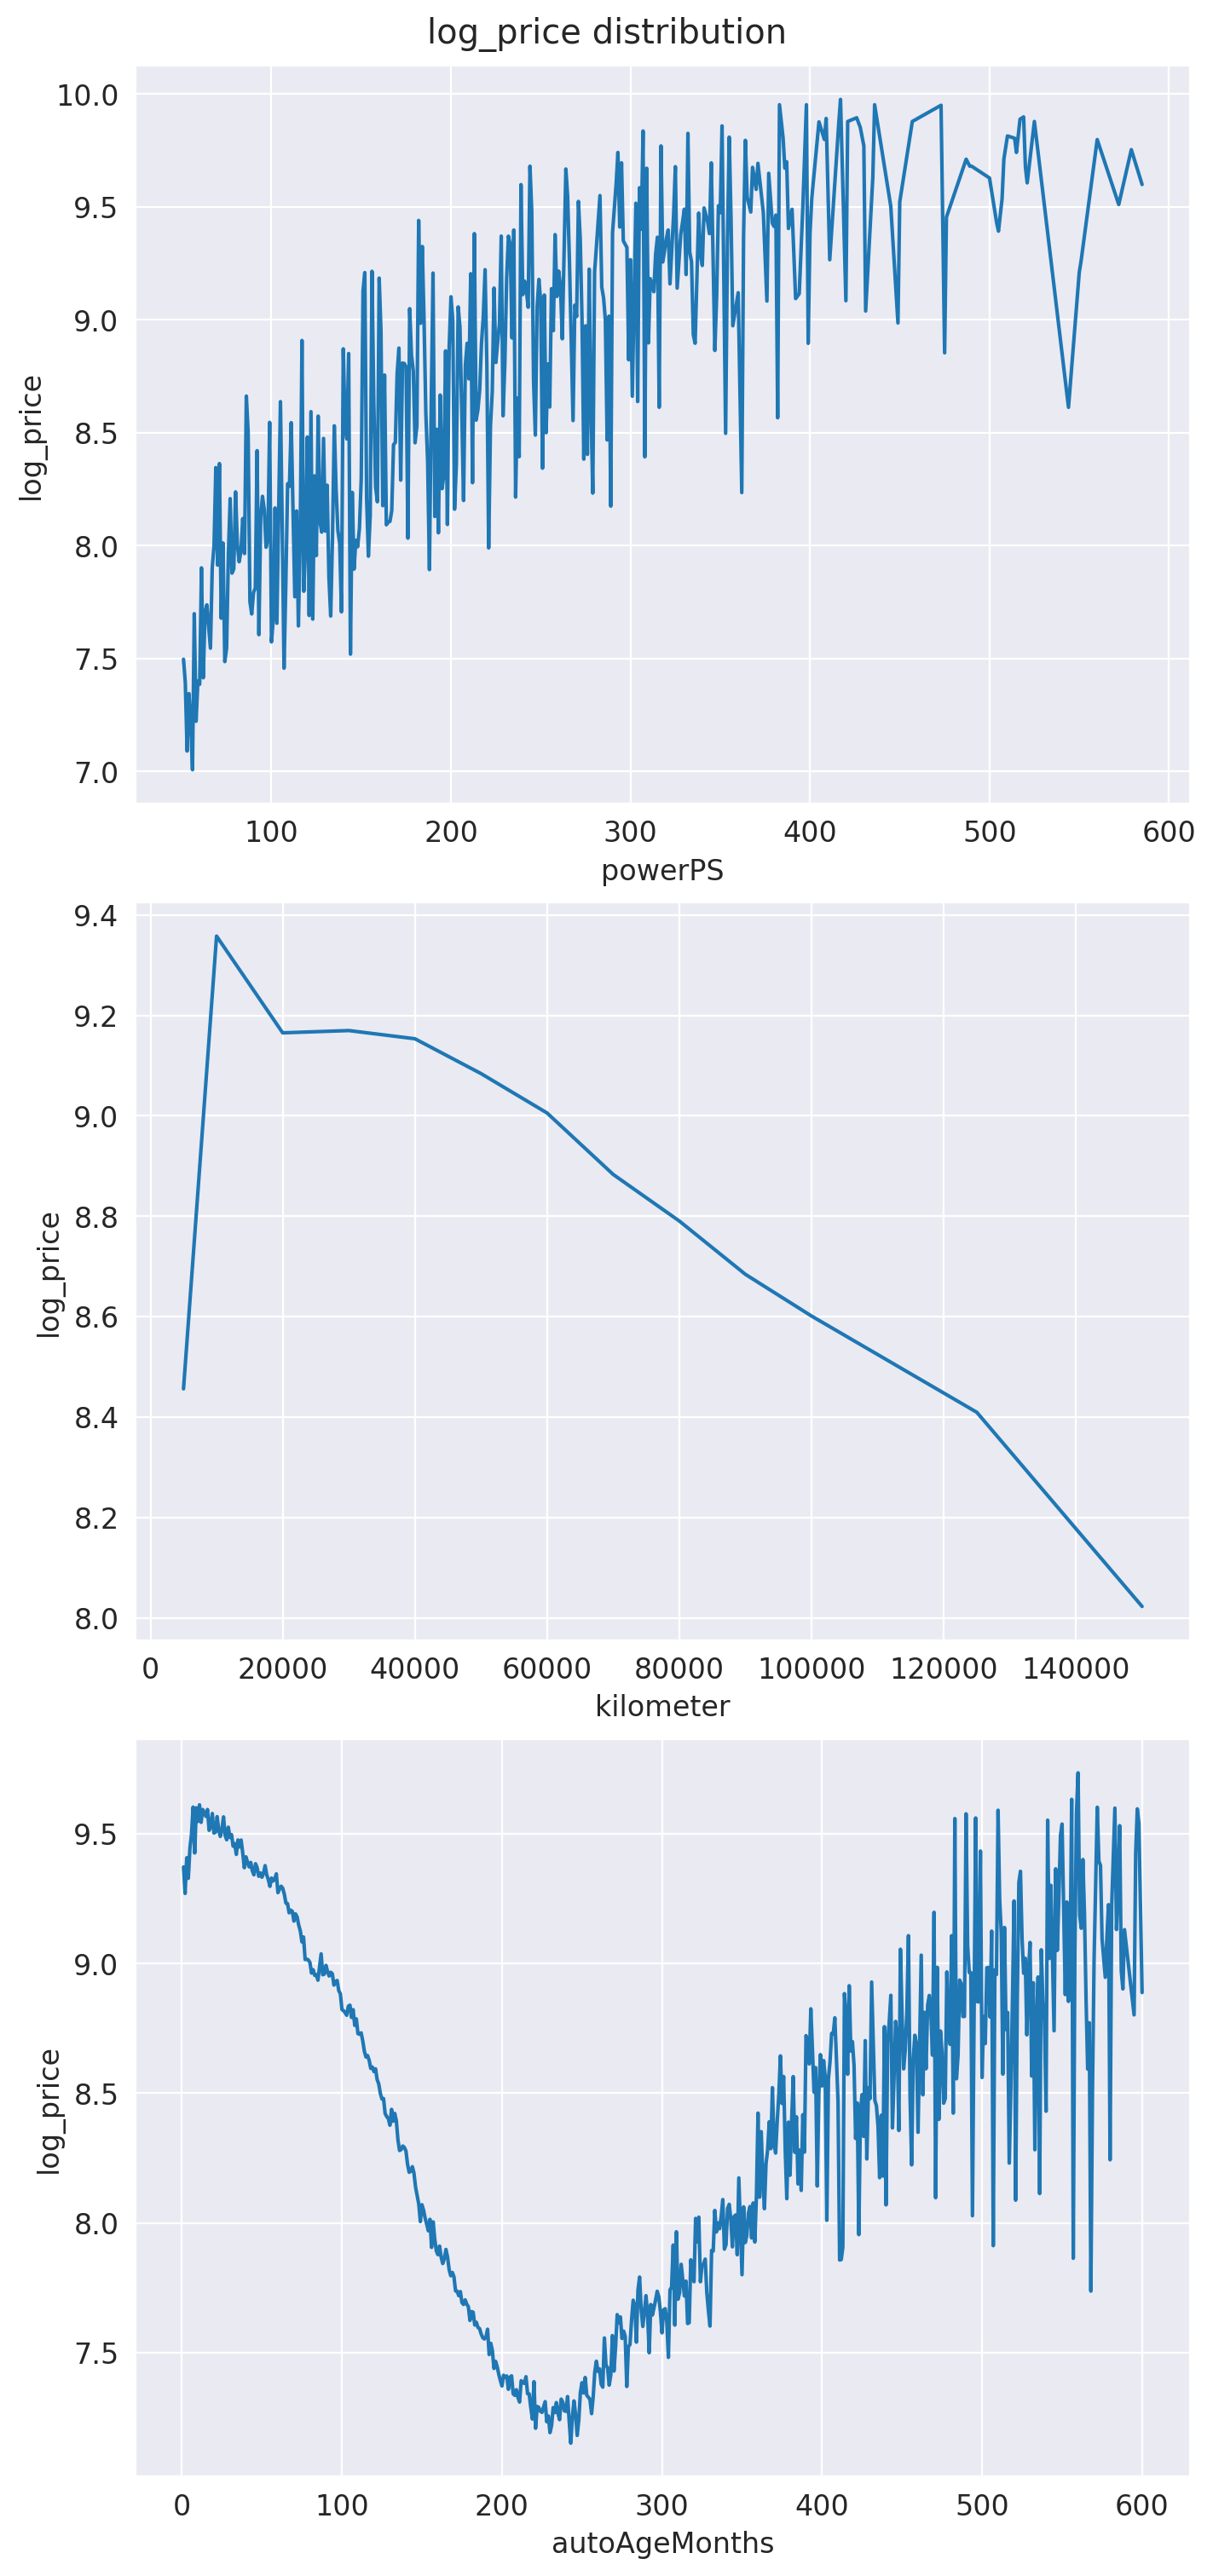

In [ ]:
fig, axs = plt.subplots(figsize=(7, 15), nrows=len(numeric), constrained_layout=True)
fig.suptitle("log_price distribution")

for i, num in enumerate(numeric):
    data.groupby(num)['log_price'].mean().plot(ax=axs[i])
    axs[i].set_xlabel(num)
    axs[i].set_ylabel("log_price")

plt.show()

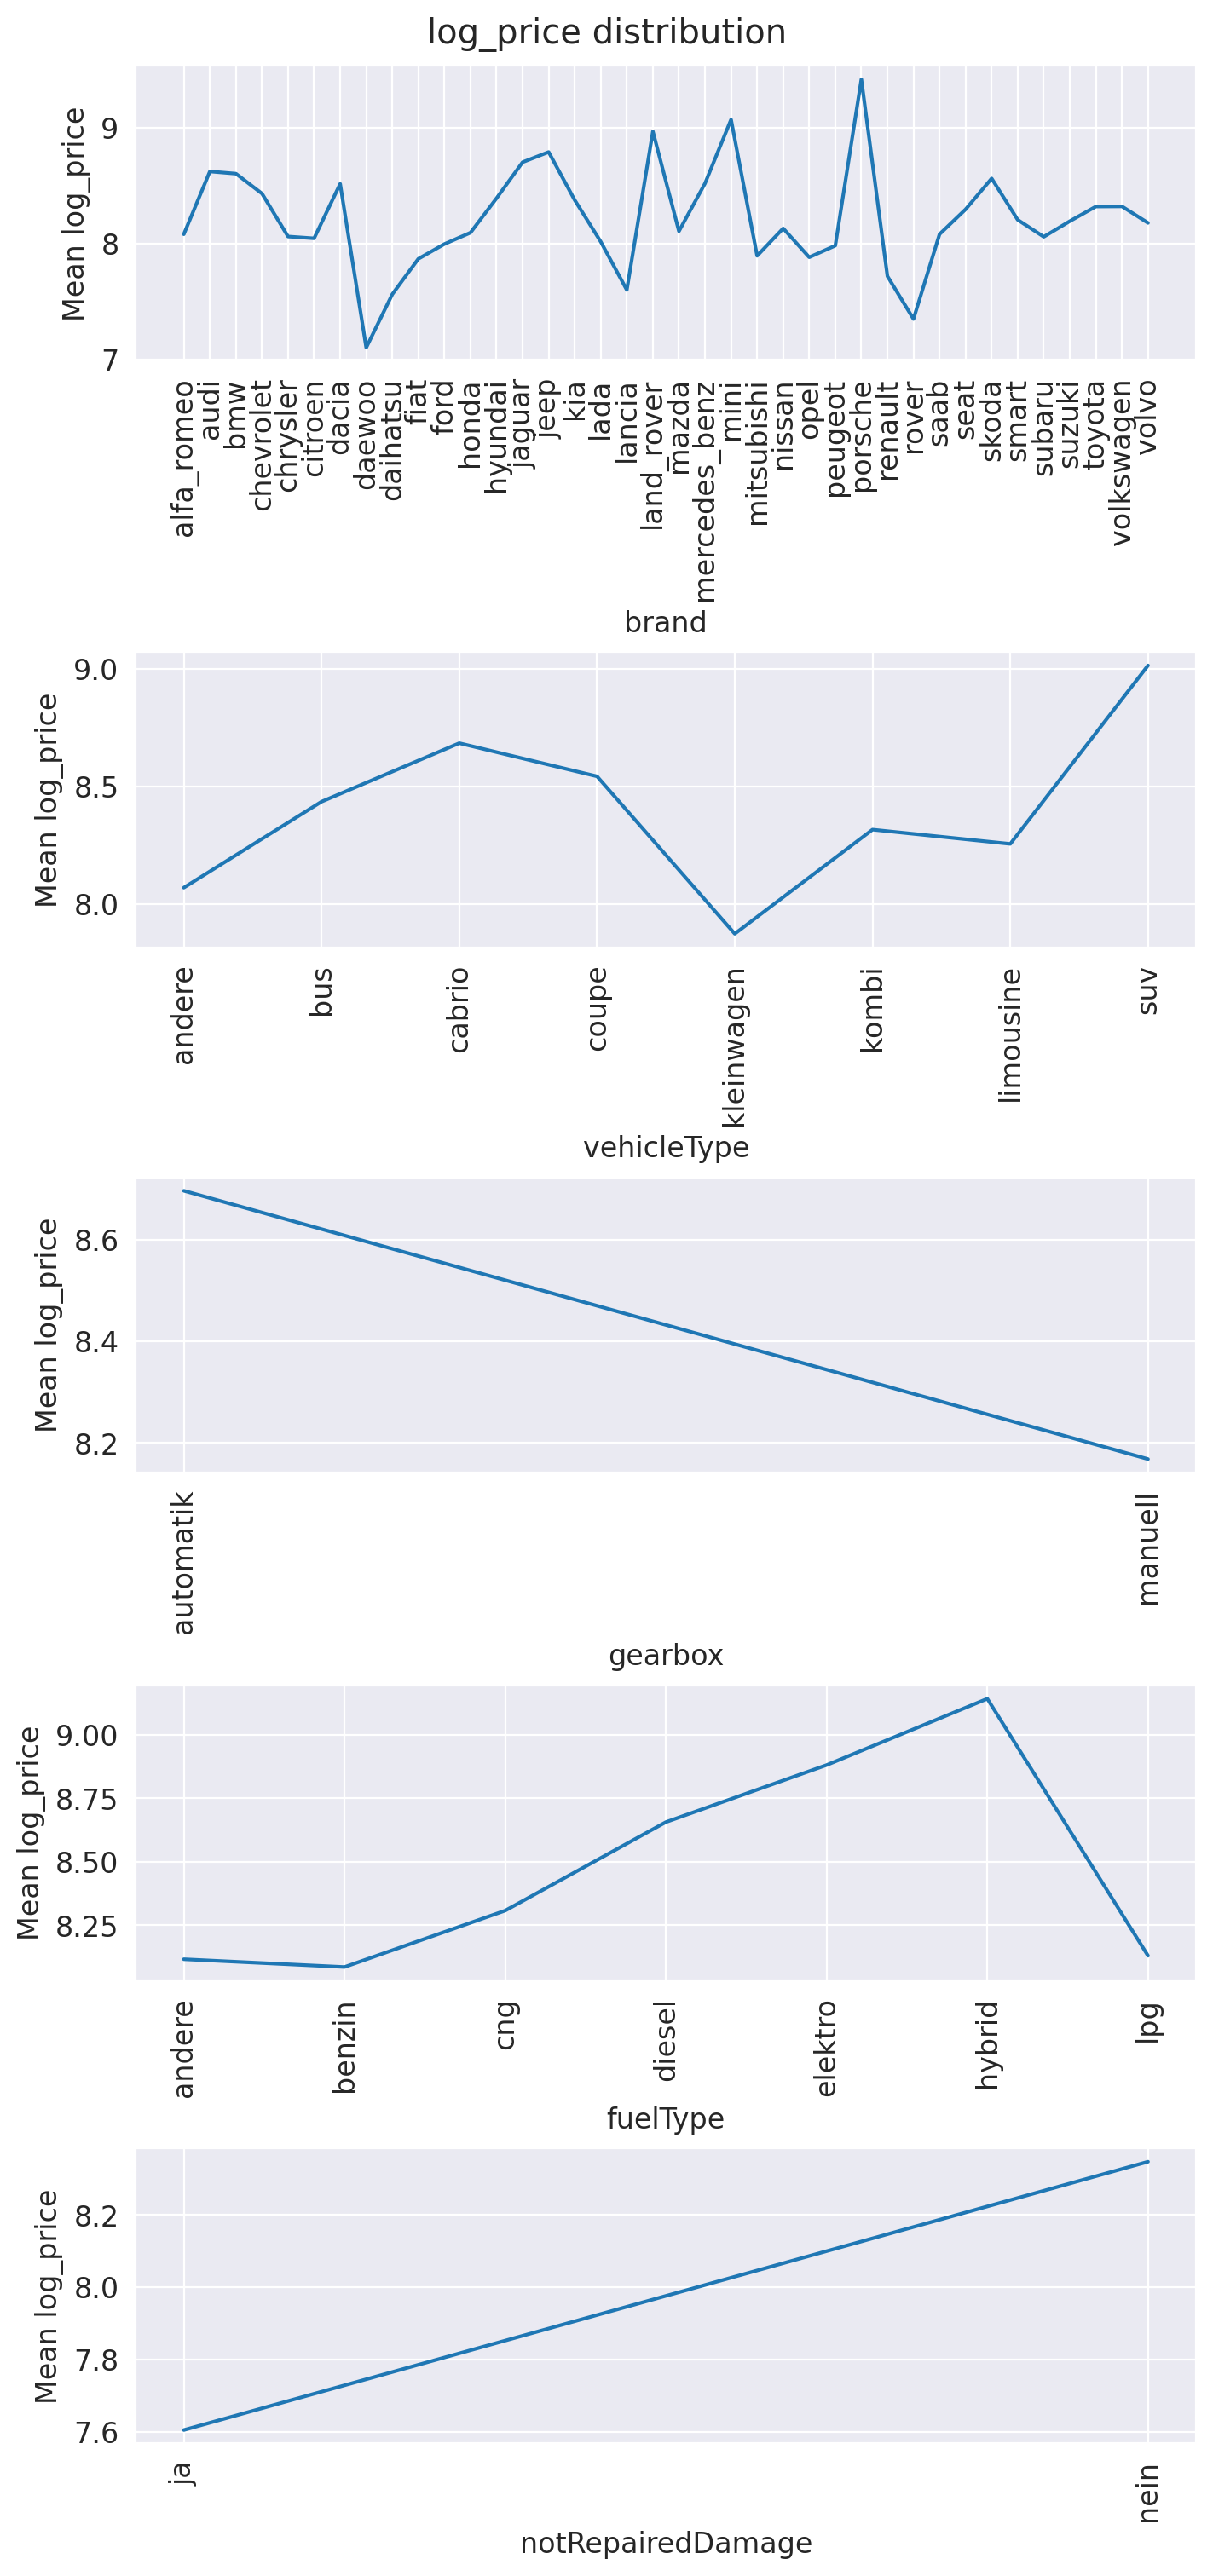

In [ ]:
cat_plt = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

fig, axs = plt.subplots(figsize=(7, 15), nrows=len(cat_plt), constrained_layout=True)
fig.suptitle("log_price distribution")
for i, cat in enumerate(cat_plt):
    tmp_df = data.groupby(cat)['log_price'].mean()
    axs[i].plot(tmp_df)

    axs[i].set_xlabel(cat)
    axs[i].tick_params(axis='x', labelrotation=90)
    axs[i].set_ylabel("Mean log_price")

plt.show()

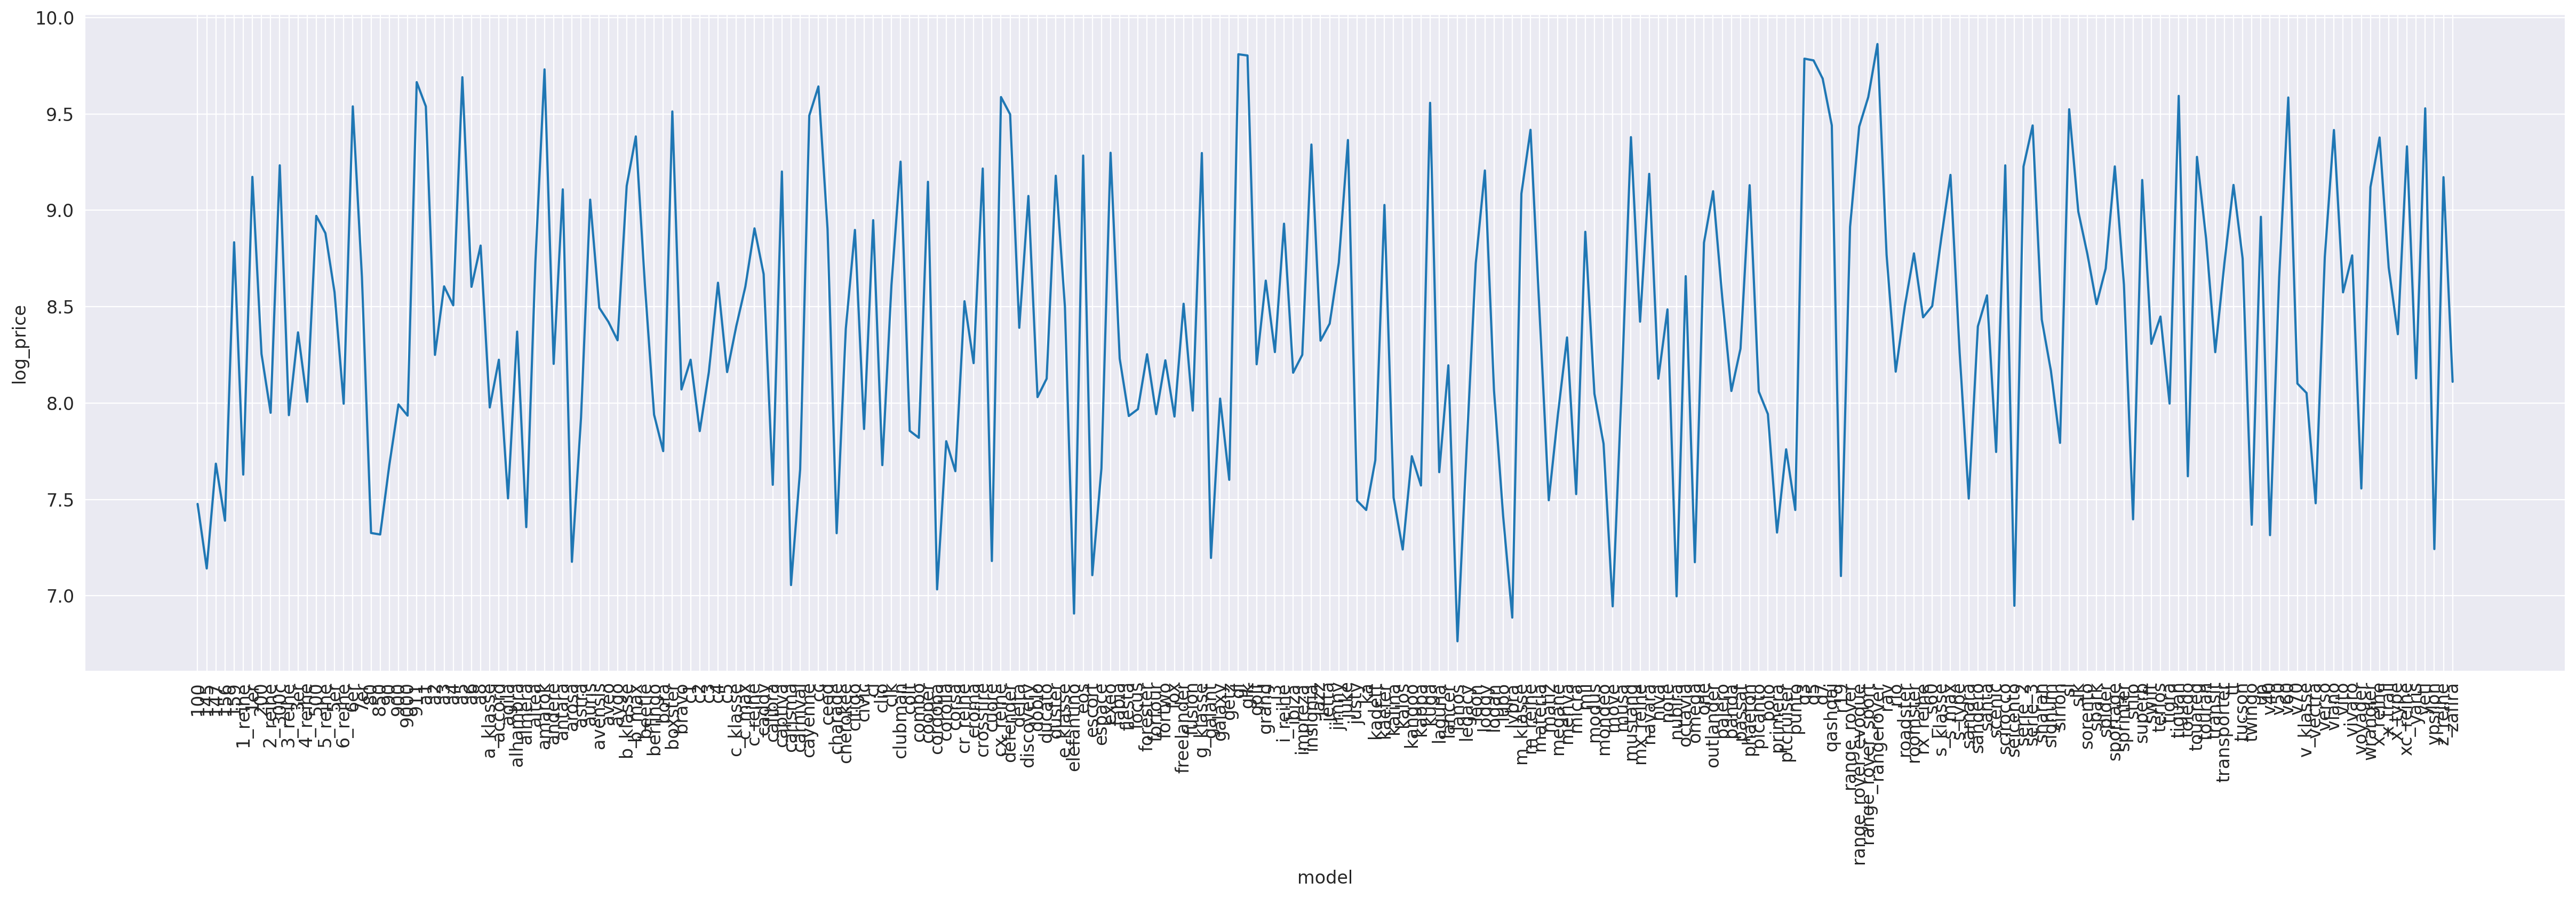

In [ ]:
fig, ax = plt.subplots(figsize=(30, 8))
sns.lineplot(
    data.groupby('model')['log_price'].mean(),
    ax=ax
)

plt.tick_params(axis='x', labelrotation=90)
plt.show()



> По большей части графиков заметна очевидная корреляция целевой переменной и параметра. Однако для параметра "model" тяжело определить зависимости + этот параметр содержит чересчур большое кол-во неинформативных значений (предлагаю от него избавиться)


> Параметр "brand" лучше разбить на 3 группы: эконом марки, средний класс, премиум. Это позволит избавиться от большого числа категориальных признаков -> уменьшит кол-во столбцов при OHE





In [ ]:
# перекодируем brand

econom = ['daewoo', 'daihatsu', 'fiat', 'lancia', 'mitsubishi', 'opel', 'renault', 'rover']
middle = ['alfa_romeo',  'chevrolet', 'chrysler', 'citroen', 'dacia', 'ford', \
          'honda', 'hyundai',  'kia', 'lada', 'mazda', 'nissan', 'peugeot', 'saab', \
          'seat', 'skoda', 'smart', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']
premium = ['audi', 'bmw', 'jaguar', 'jeep', 'land_rover', 'mercedes_benz', 'mini', 'porsche']

data['brand_class'] = np.nan
data.loc[data['brand'].isin(econom), 'brand_class']= 'econom'
data.loc[data['brand'].isin(middle), 'brand_class']= 'middle'
data.loc[data['brand'].isin(premium), 'brand_class']= 'premium'
data.sample(10)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price,brand_class
20744,opel,astra,kombi,manuell,diesel,nein,160,80000,63,9.433564,econom
6290,volkswagen,passat,kombi,manuell,benzin,nein,102,150000,184,8.071219,middle
199864,peugeot,2_reihe,kleinwagen,manuell,benzin,nein,95,90000,50,8.793460,middle
136005,volkswagen,scirocco,coupe,manuell,benzin,nein,110,150000,425,8.517393,middle
105371,opel,andere,limousine,manuell,benzin,nein,110,80000,395,7.706613,econom
94000,bmw,1er,limousine,manuell,diesel,nein,122,125000,102,9.209440,premium
74906,chevrolet,andere,suv,automatik,diesel,nein,131,60000,374,9.615805,middle
202953,mercedes_benz,c_klasse,limousine,manuell,benzin,nein,122,150000,263,6.656727,premium
82450,peugeot,3_reihe,limousine,manuell,diesel,nein,135,150000,114,8.086718,middle
20213,renault,megane,limousine,manuell,benzin,nein,95,150000,208,7.244942,econom


In [ ]:
data.drop(columns=['brand', 'model'], inplace=True)

categorical = ['brand_class', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size=1/9, train_size=8/9, random_state=2)

In [ ]:
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()

In [ ]:
data.shape, x.shape

((217527, 10), (217527, 26))

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
# determing best lambda
from sklearn.metrics import r2_score


def inverse_pred(y: np.ndarray) -> np.ndarray:
    return np.exp(y) - 1

lambdas = np.logspace(-4, 0.5, 20)
best_lambdas = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x.shape[1]
    }
}
np.random.seed(2)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'Descent_name = {descent_name}')
    descent_config['descent_name'] = descent_name

    logging_descent_lambdas = {}
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train)

        val_loss = regression.calc_loss(x_val, y_val)
        logging_descent_lambdas.setdefault(descent_name, []).append(
            {
                'model': regression,
                'lambda': lambda_,
                'val_loss': val_loss
            }
        )
    best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
    best_lambdas[descent_name] = {
        'lambda': best['lambda'],
        'model': best['model']
    }
    print(f'Best lambda = {best["lambda"]}: val_loss = {best["val_loss"]}')

    model = best['model']

    train_loss = model.calc_loss(x_train, y_train)
    test_loss = model.calc_loss(x_test, y_test)
    r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
    r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
    iter_num = model.descent.lr.iteration
    print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
          f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
    print()

Descent_name = full
Best lambda = 1.8329807108324339: val_loss = 0.24349494553443674
Best model 
 train_loss=0.24655849689281503, test_loss=0.25675091267717526, 
 r2_train=0.6136003129533858, r2_test=0.5583801085052065, iterations=105

Descent_name = stochastic
Best lambda = 0.615848211066026: val_loss = 0.2566745724289506
Best model 
 train_loss=0.25979049898789464, test_loss=0.2701037376860614, 
 r2_train=0.5988479568475433, r2_test=0.543121795919602, iterations=224

Descent_name = momentum
Best lambda = 0.2069138081114788: val_loss = 0.26323112618321476
Best model 
 train_loss=0.26630177587734954, test_loss=0.27753569702028386, 
 r2_train=0.44202152459699895, r2_test=0.3966645525518655, iterations=80

Descent_name = adam
Best lambda = 3.1622776601683795: val_loss = 0.24478584633007974
Best model 
 train_loss=0.2473532192225256, test_loss=0.2583526005646439, 
 r2_train=0.5969834383223394, r2_test=0.5371859702624817, iterations=88



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [ ]:
plot_loss_data = {
    'descent': [],
    'loss': [],
    'iteration': []
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    model = best_lambdas[descent_name]['model']
    loss_history = model.loss_history
    iterations_number = model.descent.lr.iteration + 1

    plot_loss_data['descent'] += [descent_name] * iterations_number
    plot_loss_data['loss'] += loss_history
    plot_loss_data['iteration'] += range(iterations_number)

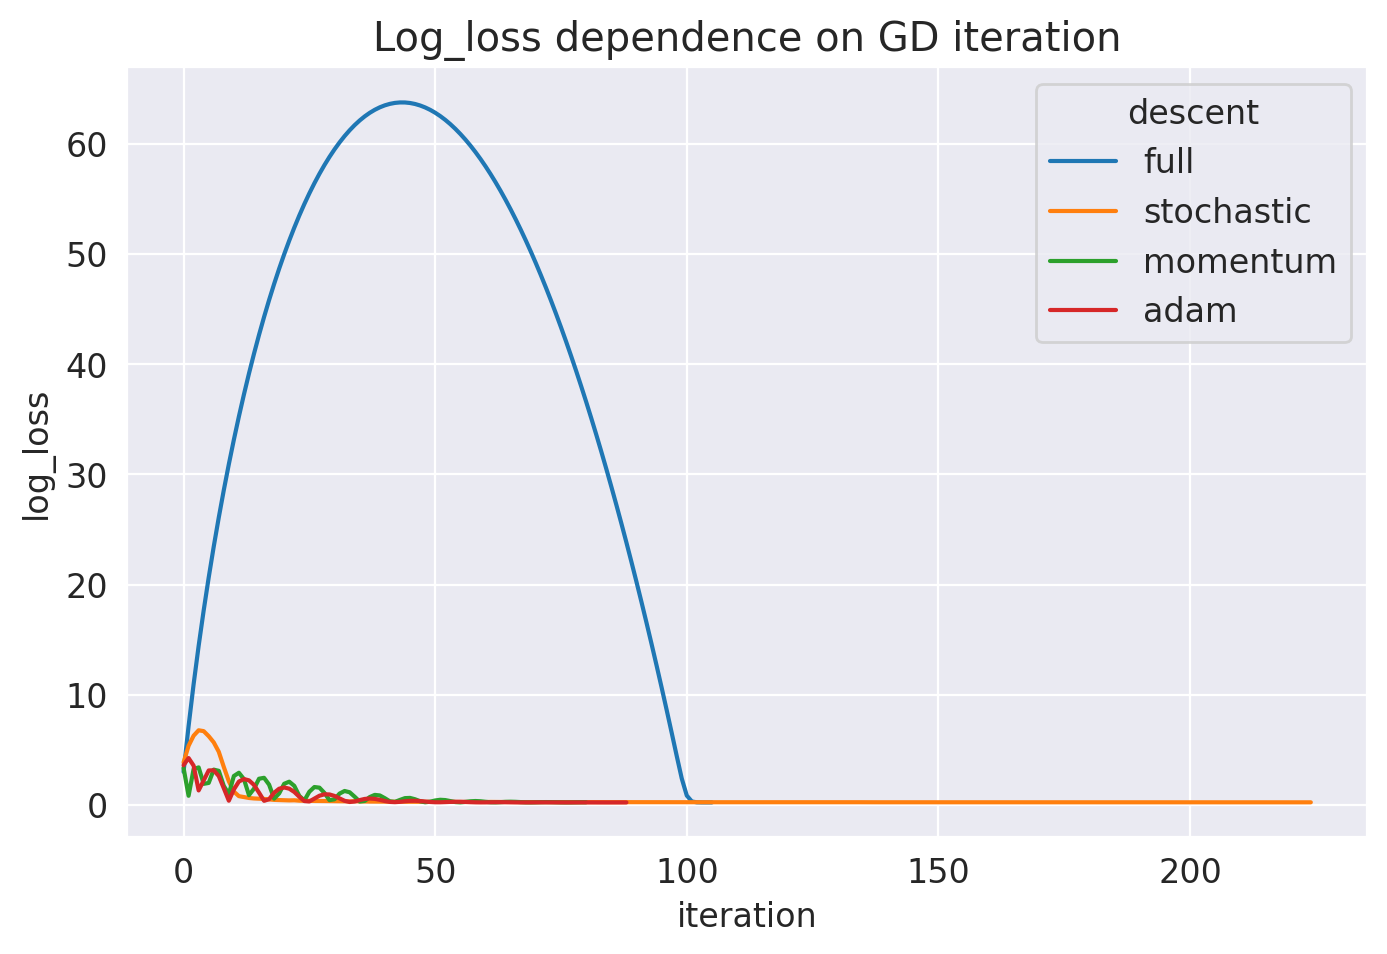

In [ ]:
plot_loss_df = pd.DataFrame(data=plot_loss_data)
plot_loss_df['log_loss'] = np.log1p(plot_loss_df['loss'])

sns.lineplot(data=plot_loss_df, x='iteration', y='log_loss', hue='descent')
plt.title("Log_loss dependence on GD iteration")
plt.show()

In [ ]:
plot_loss_df.sample(5)

,descent,loss,iteration,log_loss
84,full,1.789251e+13,84,30.515403
473,adam,2.658116e-01,61,0.235713
218,stochastic,2.684301e-01,112,0.237780
489,adam,2.475697e-01,77,0.221197
63,full,1.626146e+24,63,55.748255


Заметим, что полный GD почти взрывается, но в конце сходится к остальным вариантам, имеет наилучший R2 score и наименьшие ошибки. Честно, не могу сразу объяснить, почему происходит нечто подобное взрыву... мб в данных есть переобучение или что-то подобное

Стохастический градиентный спуск также имеет гребень в начале, но после +-5 итерации монотонно убывает и сходится к 0. Отмечу, что после 20 итерации колебания ошибки не столь заметны, однако треубет максимального среди исследуемых кол-во итераций. Стохастический вариант использует заметно меньшее кол-во объектов для подсчета градиента (треубет меньше времени) и не взрывается

Моментум ведет себя нестабильно во время обучения, ошибка убывает, но с большими колебаниями. Также метрика кач-ва R2 на данной вариации GD самая низкая из исследуемых

Adam GD, как и моментум имеет, колебания при обучении, однако сходится быстрее и его колебания не столь выражены. Стоит отметить, что он имеет одну из наименьших ошибок на трайне и тесте, а R2 входит в топ-3, также для требуется заметно меньшее кол-во итераций (88)

Overall, исходя из сказанного выше, для данной задачи я бы использовала вариацию полного GD с лучшей метрикой качества и наименьшими ошибками, либо Adam GD (за маленькой кол-во итераций доходит до минимума и имеет хороший р2 скор)



## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
from time import time

batch_sizes = np.arange(5, 500, 10)
k = 10

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': best_lambdas['stochastic']['lambda']
    }
}

logging_batches = {}

for batch_size in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch_size
    for _ in range(k):
        timestamp = time()

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train)

        time_diff = time() - timestamp
        logging_batches.setdefault(batch_size, {'time': [], 'iterations': []})['time'].append(time_diff)
        logging_batches[batch_size]['iterations'].append(regression.descent.lr.iteration)

In [ ]:
d = list(map(lambda x: [x[0],
                        sum(x[1]['time']) / k,
                        round(sum(x[1]['iterations']) / k)],
             logging_batches.items()))
batch_df = pd.DataFrame(data=d, columns=['batch_size', 'time', 'iterations'])

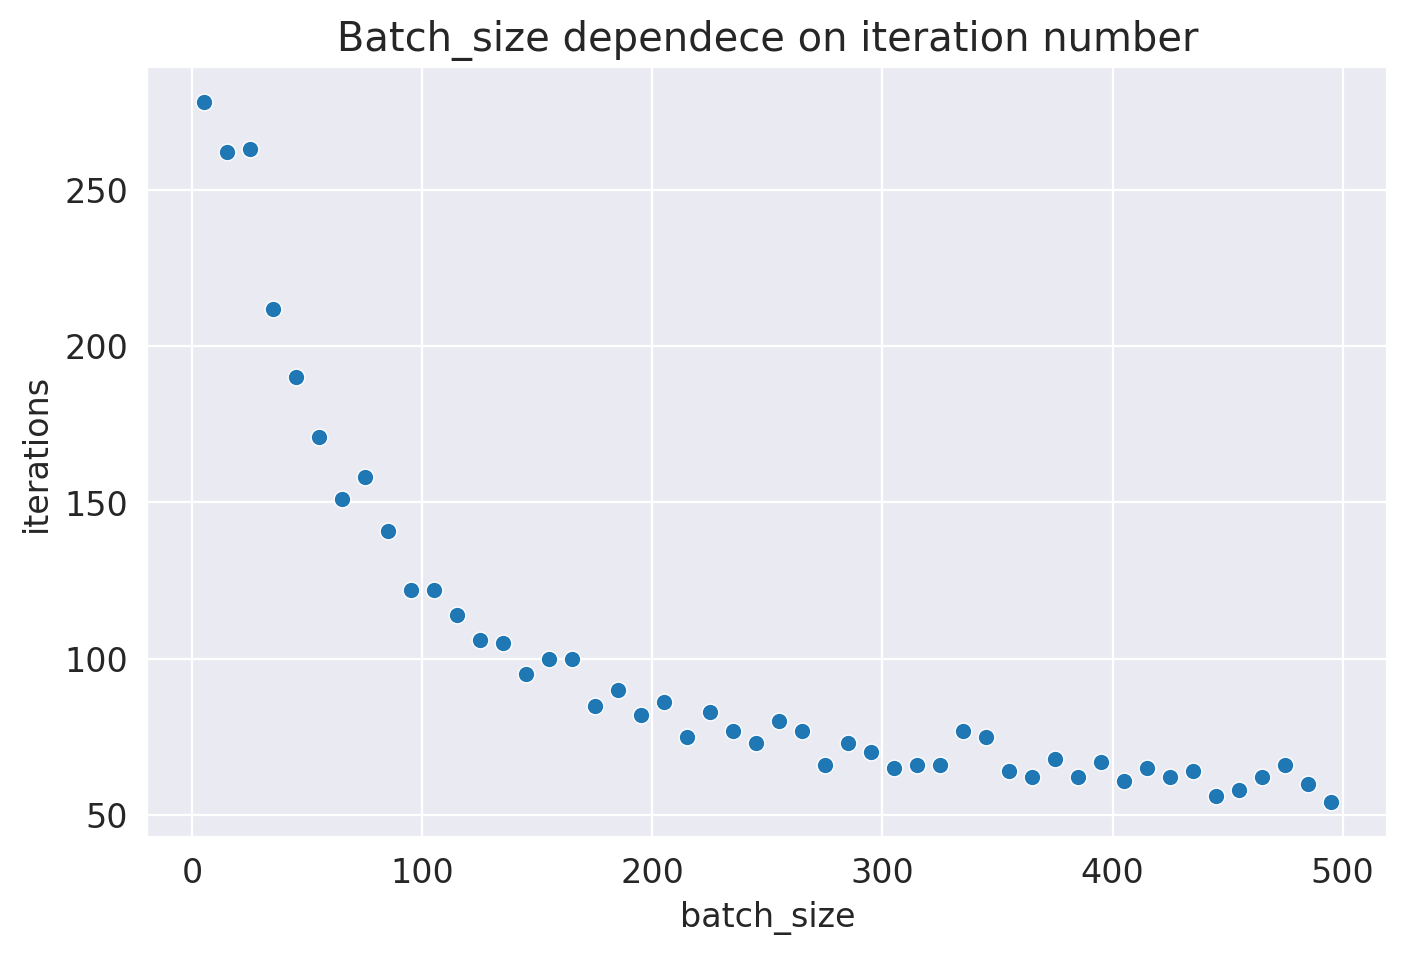

In [ ]:
sns.scatterplot(data=batch_df, x='batch_size', y='iterations')

plt.title('Batch_size dependece on iteration number')
plt.show()

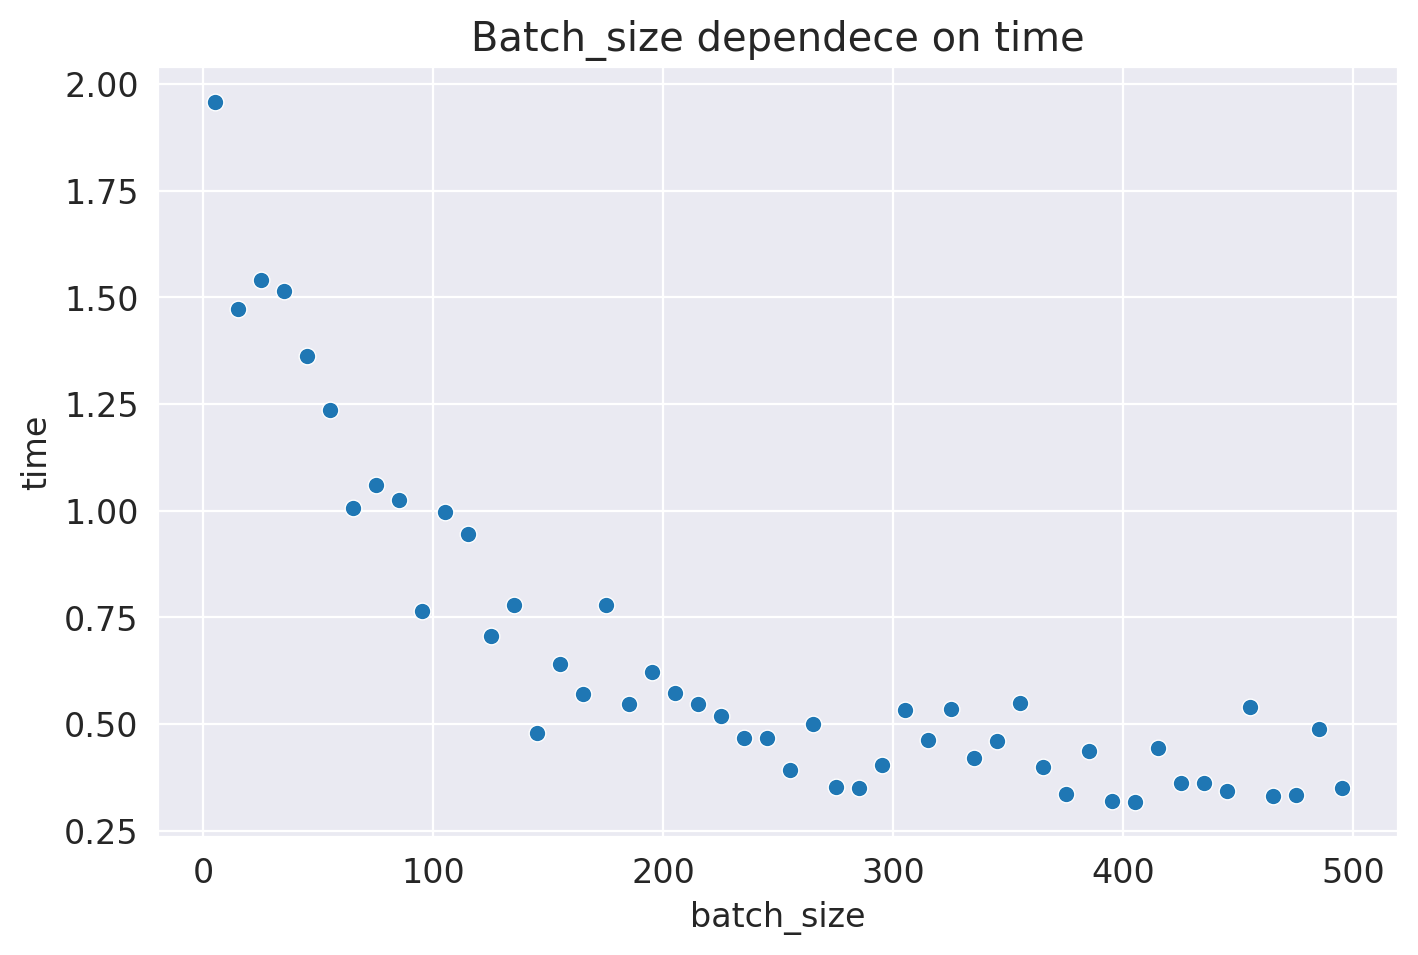

In [ ]:
sns.scatterplot(data=batch_df, x='batch_size', y='time')

plt.title('Batch_size dependece on time')
plt.show()

`Чем больше batch_size, тем ближе стохастический ГД к полному, поэтому уменьшается время сходимости обучения, а также кол-во итераций до сходимости (полный ГД сходится быстрее)`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96216379/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# determing best lambda
from sklearn.metrics import r2_score


def inverse_pred(y: np.ndarray) -> np.ndarray:
    return np.exp(y) - 1

lambdas = np.logspace(-2, 0.8, 10)
mus = np.logspace(-6, 0.5, 10)
best_parameters = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': x.shape[1]
    }
}
np.random.seed(2)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'Descent_name = {descent_name}')
    descent_config['descent_name'] = descent_name

    logging_descent_lambdas = {}
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        for mu_ in mus:
            descent_config['kwargs']['mu'] = mu_

            regression = LinearRegression(
                descent_config=descent_config
            )
            regression.fit(x_train, y_train)

            val_loss = regression.calc_loss(x_val, y_val)
            logging_descent_lambdas.setdefault(descent_name, []).append(
                {
                    'model': regression,
                    'mu': mu_,
                    'lambda': lambda_,
                    'val_loss': val_loss
                }
            )
    best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
    best_parameters[descent_name] = {
        'lambda': best['lambda'],
        'mu': best['mu'],
        'model': best['model']
    }
    print(f'Best lambda = {best["lambda"]} & Best mu = {best["mu"]}: val_loss = {best["val_loss"]}')

    model = best['model']

    train_loss = model.calc_loss(x_train, y_train)
    test_loss = model.calc_loss(x_test, y_test)
    r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
    r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
    iter_num = model.descent.lr.iteration
    print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
          f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
    print()

Descent_name = full
Best lambda = 1.5058363542798414 & Best mu = 0.000774263682681127: val_loss = 0.2549553207869449
Best model 
 train_loss=0.258212602037165, test_loss=0.2666648980966483, 
 r2_train=0.6019706476883764, r2_test=0.5481287272398336, iterations=40

Descent_name = stochastic
Best lambda = 0.7356422544596414 & Best mu = 1e-06: val_loss = 0.24996315758929505
Best model 
 train_loss=0.253001070757423, test_loss=0.2612818341770725, 
 r2_train=0.5704695956876562, r2_test=0.5229570628577318, iterations=279

Descent_name = momentum
Best lambda = 1.5058363542798414 & Best mu = 0.004084238652674522: val_loss = 0.2451475225901232
Best model 
 train_loss=0.24804746015024806, test_loss=0.2576349583049231, 
 r2_train=0.6184355355022497, r2_test=0.5633651471613998, iterations=300

Descent_name = adam
Best lambda = 6.309573444801933 & Best mu = 0.0001467799267622069: val_loss = 0.2439575620041399
Best model 
 train_loss=0.24677566127430411, test_loss=0.2570758124071696, 
 r2_train=0.645

In [ ]:
plot_reg_data = {
    'descent': [],
    'loss': [],
    'iteration': []
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    model = best_parameters[descent_name]['model']
    loss_history = model.loss_history
    iterations_number = model.descent.lr.iteration + 1

    reg_descent_name = 'reg_' + descent_name
    plot_reg_data['descent'] += [reg_descent_name] * iterations_number
    plot_reg_data['loss'] += loss_history
    plot_reg_data['iteration'] += range(iterations_number)

In [ ]:
plot_reg_df = pd.DataFrame(data=plot_reg_data)
plot_reg_df['log_loss'] = np.log1p(plot_reg_df['loss'])

In [ ]:
plot_comparison_df = pd.concat([plot_reg_df, plot_loss_df])

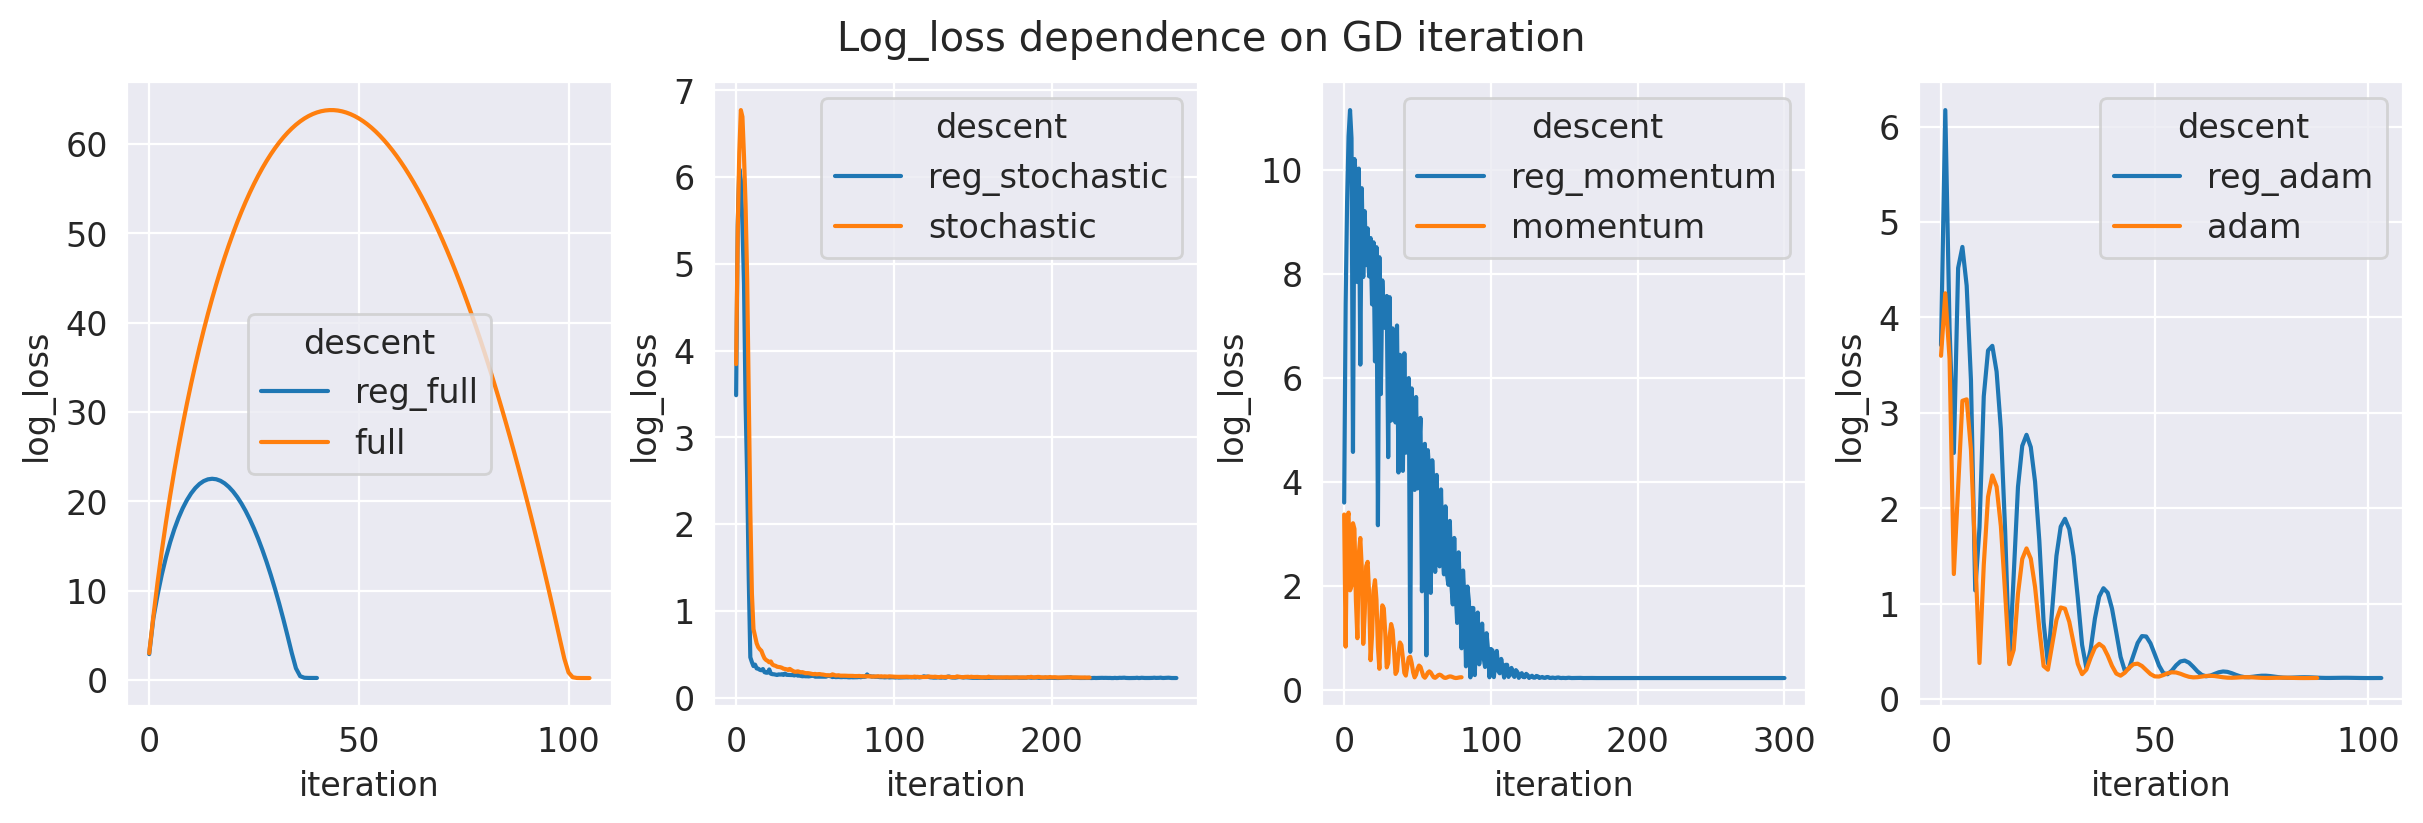

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=4, constrained_layout=True)
fig.suptitle("Log_loss dependence on GD iteration")
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    selected_descents = plot_comparison_df[plot_comparison_df['descent'].isin([descent_name, 'reg_' + descent_name])]
    sns.lineplot(data=selected_descents, x='iteration', y='log_loss', hue='descent', ax=axs[i])

plt.show()

Для полного ГД гипотеза о переобучении => вызрыве подтверждается. При добавлении регуляризации, модель меньше переобучается, взрыв сократился в 3 раза

Также положительно регуляризации влияет и на стохастический ГД, слегка заметна более быстрая сходимость

А вот про моментум и адам тоже самое сказать нельзя. Эти две вариации без регуляризации сходились куда быстрее, зато регуляризация помогла улучшить их р2 скор - несомненный плюс

Для задачи при текущих входных данных, я бы использовала метод Адам с реугляризацией

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \dfrac{dL(y, a)} {dw}
    =
    (\log\left(\cosh(a - y)\right))' dw = \dfrac{1} {\cosh(Xw - y)} sech(Xw - y) X dw = tanh(Xw - y) X dw = (X^T tanh(Xw - y))^T dw
$$

$$
    \nabla Q(w) = X^T tanh(Xw - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
from descents import LossFunction

lambdas = np.logspace(-4, 0.5, 20)
best_log_loss = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
np.random.seed(2)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'Descent_name = {descent_name}')
    descent_config['descent_name'] = descent_name

    logging_descent_lambdas = {}
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train)

        val_loss = regression.calc_loss(x_val, y_val)
        logging_descent_lambdas.setdefault(descent_name, []).append(
            {
                'model': regression,
                'lambda': lambda_,
                'val_loss': val_loss
            }
        )
    best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
    best_log_loss[descent_name] = {
        'lambda': best['lambda'],
        'model': best['model']
    }
    print(f'Best lambda = {best["lambda"]}: val_loss = {best["val_loss"]}')

    model = best['model']

    train_loss = model.calc_loss(x_train, y_train)
    test_loss = model.calc_loss(x_test, y_test)
    r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
    r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
    iter_num = model.descent.lr.iteration
    print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
          f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
    print()

Descent_name = full
Best lambda = 3.1622776601683795: val_loss = 0.10599463889672511
Best model 
 train_loss=0.10729929657919955, test_loss=0.1106211684271348, 
 r2_train=0.6353590153582566, r2_test=0.5851652457394815, iterations=45

Descent_name = stochastic
Best lambda = 1.8329807108324339: val_loss = 0.1012530431971838
Best model 
 train_loss=0.10259082413877335, test_loss=0.10639233754274872, 
 r2_train=0.6286749783816851, r2_test=0.5801675505060652, iterations=226

Descent_name = momentum
Best lambda = 3.1622776601683795: val_loss = 0.1010736608264019
Best model 
 train_loss=0.1021011940583342, test_loss=0.10611822700594856, 
 r2_train=0.6473733079937616, r2_test=0.5882976254633386, iterations=101

Descent_name = adam
Best lambda = 1.8329807108324339: val_loss = 0.10032491873532356
Best model 
 train_loss=0.10142512304548255, test_loss=0.10531229893269282, 
 r2_train=0.6271849045271234, r2_test=0.5768406193194562, iterations=79



Очевидно, что кач-во сильно улучшилось по сравнению с теми же ГД, но обучаемых на MSE. Это связано в первую очередь, что LogCosh безразлична к большим ошибкам (как и Хубер лосс) и больше акцентирует внимание на отклонениях от правильного ответа, но эта функция дифференцируема на всей числовой прямой.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`Я обожаю запеченные блюда. Они всегда напоминают о семейных ужинах поздней осенью, зимой.`

`С переездом в Москву для себя одной готовить обычно лень, но на каникулах или праздниках пробуждаются особо яркие кулинарные порывы. Поэтому в данной секции я расскажу свой ФИРМЕННЫЙ рецепт запеченного мяса`



> *Ингредиенты*:
> * мясо (утка, говядина, свинина)
> * картофель
> * морковь
> * грибы
> * брюссельская капуста
> * специи (соль, перец черный, чили, паприка, орегано, чеснок)
> * масло (я предпочитаю горчичное или оливковое)
>
> *Рецепт:*
> 1. Мясо маринуем в оливковом масле и специях кроме соли (оставляем мариноваться на 2 часа, а лучше ночь)
> 2. Овощи моем, чистим и засыпаем специями кроме соли
> 3. Духовку разогриваем на 180-200 градусов
> 4. Солим овощи и мясо, складываем их в пакет для запекания
> 5. Ставим в духовку на 60-90 минут

> `Вуа-ля! Через час наслаждаемся пищей богов`

Рецепт очень простой и очень вкусный + можно накормить целую компанию



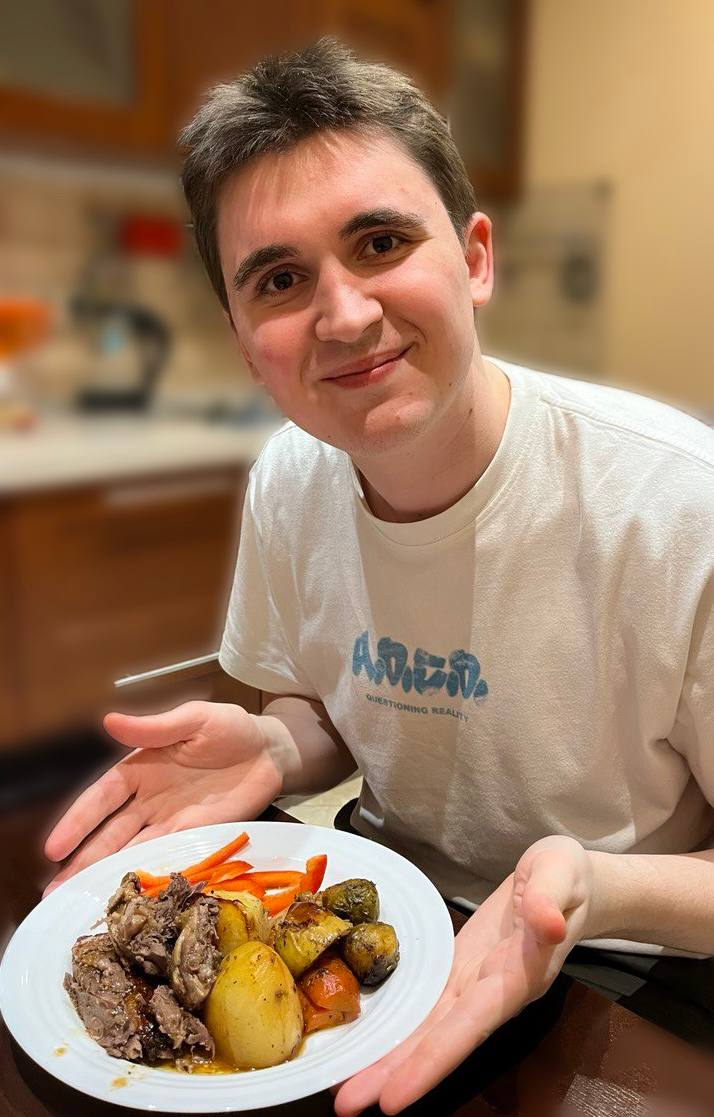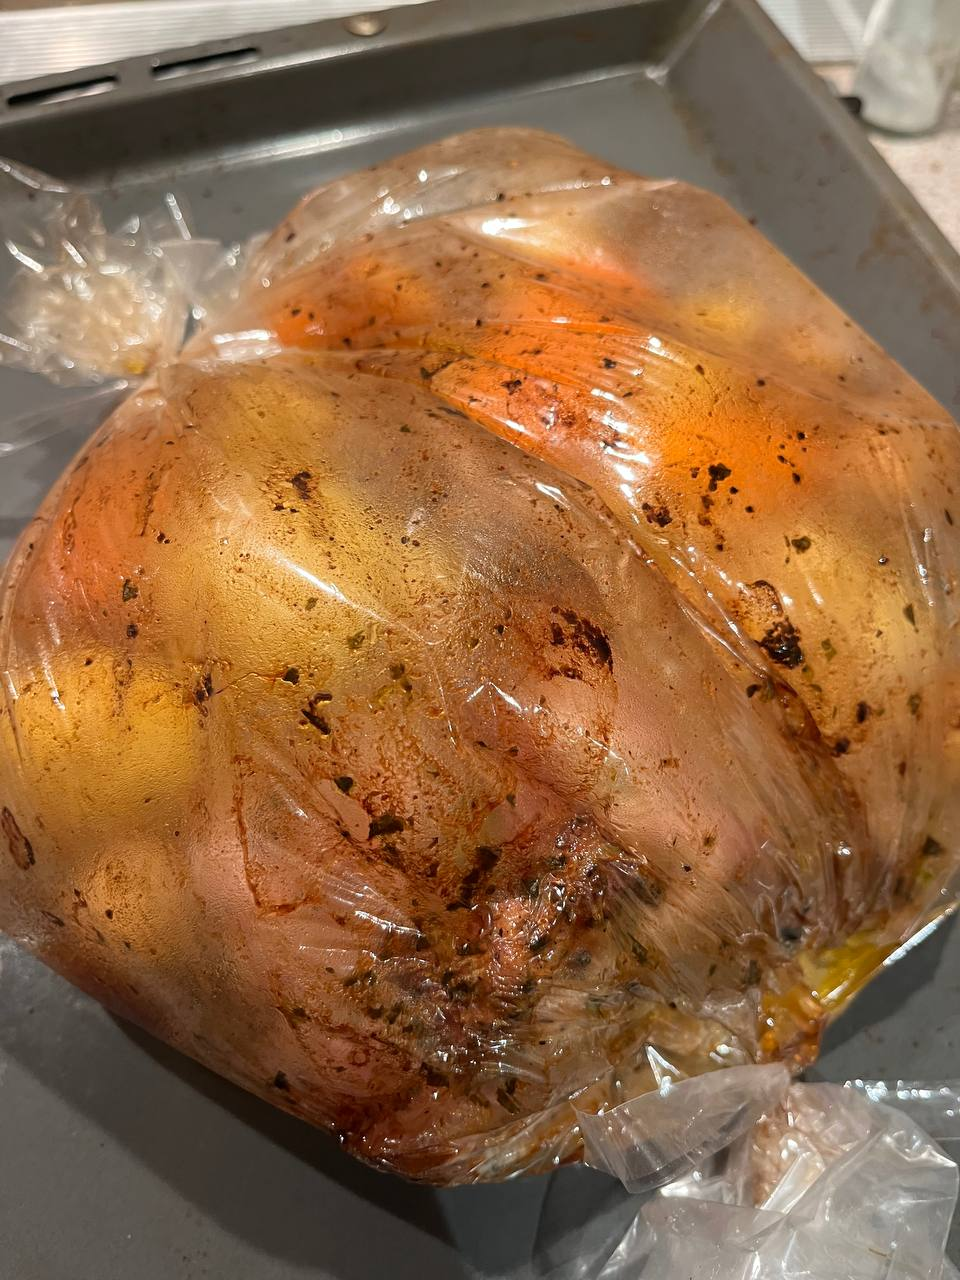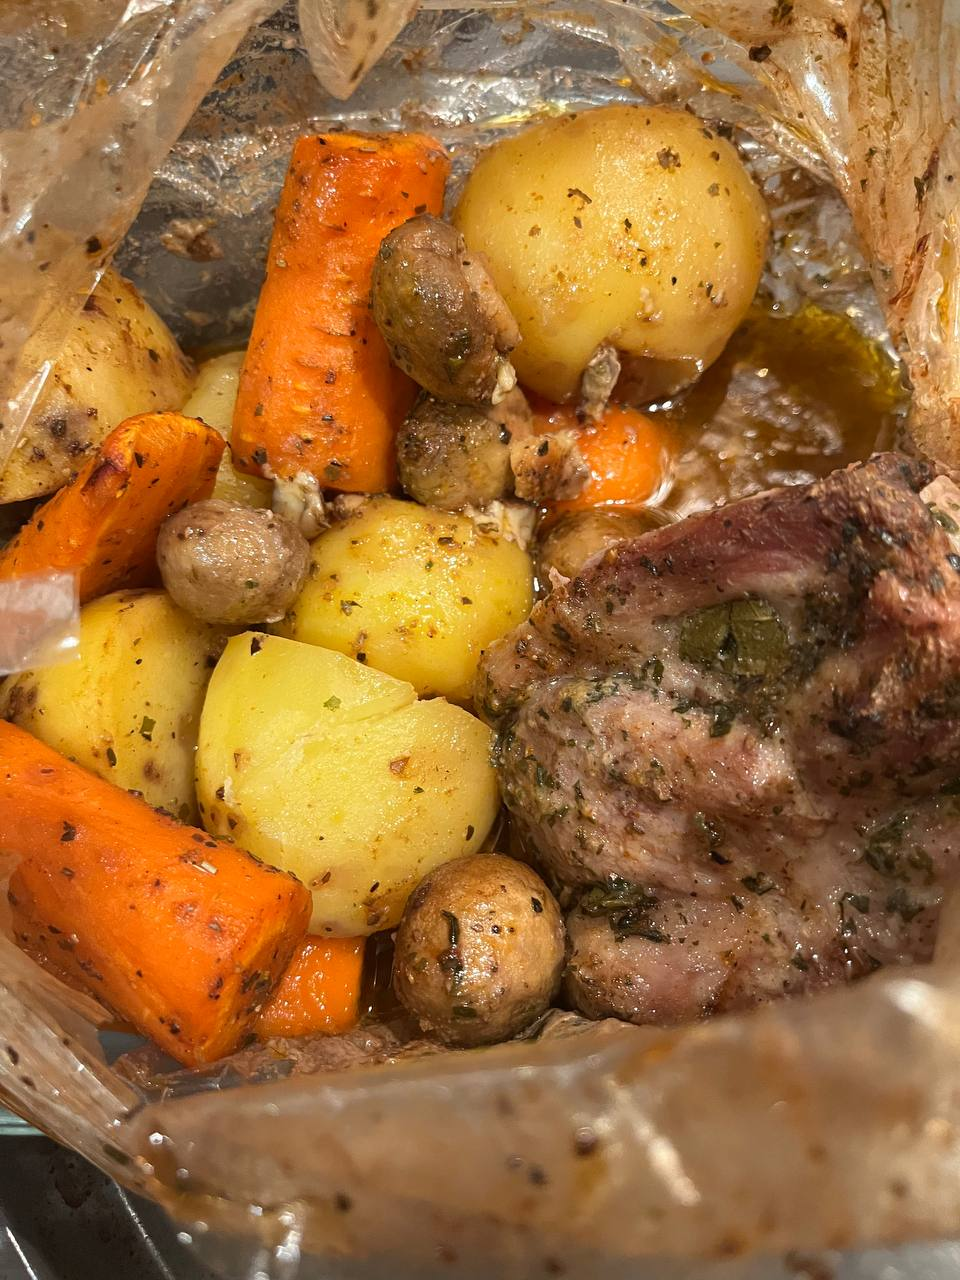

### ПРОСТИ МЕНЯ, ДОРОГОЙ ПРОВЕРЯЮЩИЙ!

ТЫ СКОРЕЕ ВСЕГО СМОТРИШЬ НА ЭТО НОЧЬЮ, НАДЕЮСЬ ТЫ ПОЕЛ!

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
lambdas = np.logspace(-2, 0.8, 10)

descent_name = 'nadam'
descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': x.shape[1]
    }
}
np.random.seed(2)

print(f'Descent_name = {descent_name}')

logging_descent_lambdas = {}
for lambda_ in lambdas:
    descent_config['kwargs']['lambda_'] = lambda_

    regression = LinearRegression(
        descent_config=descent_config
    )
    regression.fit(x_train, y_train)

    val_loss = regression.calc_loss(x_val, y_val)
    logging_descent_lambdas.setdefault(descent_name, []).append(
        {
            'model': regression,
            'lambda': lambda_,
            'val_loss': val_loss
        }
    )
best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
print(f'Best lambda = {best["lambda"]}: val_loss = {best["val_loss"]}')

model = best['model']

train_loss = model.calc_loss(x_train, y_train)
test_loss = model.calc_loss(x_test, y_test)
r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
iter_num = model.descent.lr.iteration
print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
        f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
print()

Descent_name = nadam
Best lambda = 0.35938136638046275: val_loss = 0.2428703974912487
Best model 
 train_loss=0.24581860655842871, test_loss=0.2558503915628372, 
 r2_train=0.62026900628705, r2_test=0.5639490619350455, iterations=51



Эта вариация ГД превосходит предыдущии реализации как по количеству итераций до сходимости, так и по качеству. Очень Хороший вариант для обучения

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

$$
    \dfrac{dMAE} {dw} = (\dfrac{1} {l} ∑ |Xw - y|)' dw = \dfrac{1} {l} sign(Xw - y) X dw   
$$ - (производная модуля - знак)

$$
    ∇Q(w) = \dfrac{1} {l} X^T [Xw > y]
$$

$$
    \dfrac{dHuber} {dw}
$$ - представляет собой комбинацию MSE и MAE, поэтому можем просто записать дифференциал как

$$
    ∇Q(w) = \dfrac{δ} {l} X^T sign(Xw - y), \delta <= |y - Xw| - MAE
$$
$$
    ∇Q(w) = \dfrac{1} {l} X^T (y - Xw), \delta > |y - Xw| - MSE
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
from descents import LossFunction

lambdas = np.logspace(-4, 0.5, 5)
deltas = np.logspace(-3, 1, 2)
best_log_loss = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
np.random.seed(2)

for loss_name in [LossFunction.MAE, LossFunction.Huber]:
# for loss_name in [LossFunction.Huber]:
    descent_config['kwargs']['loss_function'] = loss_name
    print(f'Loss Function = {loss_name}')
    for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
        print(f'Descent_name = {descent_name}')
        logging_descent_lambdas = {}
        descent_config['descent_name'] = descent_name
        for delta_ in deltas:
            descent_config['kwargs']['delta_'] = delta_

            for lambda_ in lambdas:
                descent_config['kwargs']['lambda_'] = lambda_

                regression = LinearRegression(
                    descent_config=descent_config
                )
                regression.fit(x_train, y_train)

                val_loss = regression.calc_loss(x_val, y_val)
                logging_descent_lambdas.setdefault(descent_name, []).append(
                    {
                        'model': regression,
                        'lambda': lambda_,
                        'delta': delta_,
                        'val_loss': val_loss
                    }
                )
        best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
        best_log_loss[descent_name] = {
            'lambda': best['lambda'],
            'delta': best['delta'],
            'model': best['model']
        }
        print(f'Best lambda = {best["lambda"]} and delta = {best["delta"]}: val_loss = {best["val_loss"]}')

        model = best['model']

        train_loss = model.calc_loss(x_train, y_train)
        test_loss = model.calc_loss(x_test, y_test)
        r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
        r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
        iter_num = model.descent.lr.iteration
        print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
            f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
        print()

Loss Function = LossFunction.MAE
Descent_name = full
Best lambda = 3.1622776601683795 and delta = 0.001: val_loss = 0.34092730935635396
Best model 
 train_loss=0.34259158162527675, test_loss=0.34837346441915196, 
 r2_train=0.7048064330549284, r2_test=0.651660488351449, iterations=222

Descent_name = stochastic
Best lambda = 3.1622776601683795 and delta = 0.001: val_loss = 0.3455682075676932
Best model 
 train_loss=0.3473203987909643, test_loss=0.35223983650305696, 
 r2_train=0.690484349093996, r2_test=0.64352443527505, iterations=300

Descent_name = momentum
Best lambda = 3.1622776601683795 and delta = 10.0: val_loss = 0.34098216954648114
Best model 
 train_loss=0.3423852051996348, test_loss=0.347944421081477, 
 r2_train=0.7103945662526359, r2_test=0.65819287685621, iterations=132

Descent_name = adam
Best lambda = 3.1622776601683795 and delta = 0.001: val_loss = 0.3403101184018923
Best model 
 train_loss=0.3418629953843823, test_loss=0.34753142634783757, 
 r2_train=0.7075502080012233,

MAE также значительно улучшает кач-во, это связано c тем, что MAE игнорирует выбросы

Хубер запустить как нужно не удалось. Реализация вроде корректная, формулы верные, но не заработало

Среди всех проверенных вариантов МАЕ + momentum показало наилучший скор р2 = 0.658. Комбинация данной функции потерь + ГД, тк эффективно решает проблему выбросов в выборке